Homework1 Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [2]:
# read in data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


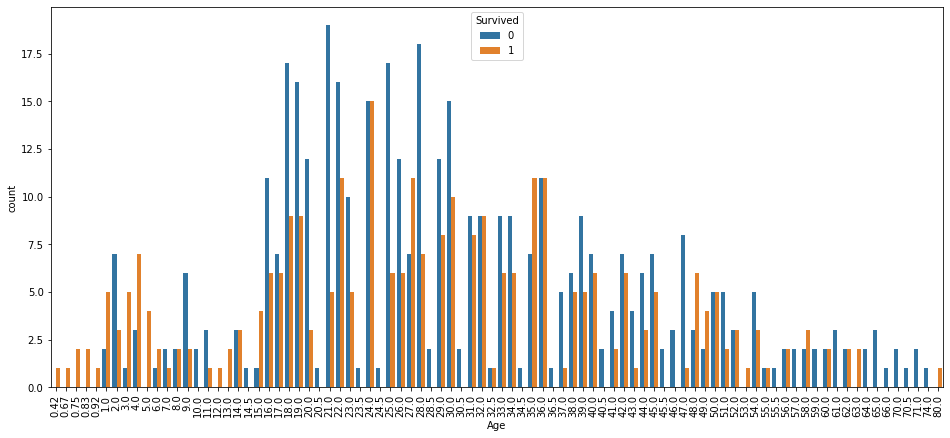

In [4]:
# find pattern for Age vs Survived
plt.figure(figsize = (16,7))
sns.countplot(x="Age", hue = "Survived", data = train)
plt.xticks(rotation="vertical")
plt.show()

We noticed that there are people who are between 15 and 30 have a lower survival rate. We can then seperate people into several age groups: (0-15), (15-30), (30-55), (55+) so that we can have a better prediction. 

After reviewing the dataset, we want to drop "PassengerId", "Name", "Ticket", "Embarked" which are obviously unhelpgul for prediction. We also want to drop "Cabin" since it contains too many NaN. 

In [5]:
# cleaning data
# replace null value in "age" with mean
def mean_to_null_train(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age
# replace null value in "Fare" with mean   
def replace_Fare_null_train(cols):
    Fare = cols[0]
    Pclass = cols[1]
    if pd.isnull(Fare):
        return int(train[train["Pclass"] == Pclass]["Fare"].mean())
    else:
        return Fare
# start replacing
train["Age"] = train[["Age", "Pclass"]].apply(mean_to_null_train,axis=1)
train["Fare"] = train[["Fare", "Pclass"]].apply(replace_Fare_null_train,axis=1)
train.drop(["PassengerId", "Ticket", "Cabin", "Embarked","Name"],axis=1,inplace = True)
# add different age group to make better prediction
train["AgeGroup"] = ""
train.loc[train["Age"] < 15, "AgeGroup"] = '<15'
train.loc[(15 <= train["Age"]) & (train["Age"] < 30), "AgeGroup"] = "15-30"
train.loc[(30 <= train["Age"]) & (train["Age"] < 50), "AgeGroup"] = "30-50"
train.loc[train["Age"] >= 55, "AgeGroup"] = ">50"

In [6]:
# turn categorical variables into dummy variables
sex = pd.get_dummies(train["Sex"], drop_first = True)
pclass = pd.get_dummies(train["Pclass"],drop_first=True)
age = pd.get_dummies(train["AgeGroup"], drop_first = True)
# put new variables with original dataset
train = pd.concat([train,pclass,sex,age],axis=1)
# drop catagorical columns
train.drop(["Sex", "Age", "Pclass","AgeGroup"],axis=1,inplace = True)

In [7]:
train.head()

,Survived,SibSp,Parch,Fare,2,3,male,15-30,30-50,<15,>50
0,0,1,0,7.2500,0,1,1,1,0,0,0
1,1,1,0,71.2833,0,0,0,0,1,0,0
2,1,0,0,7.9250,0,1,0,1,0,0,0
3,1,1,0,53.1000,0,0,0,0,1,0,0
4,0,0,0,8.0500,0,1,1,0,1,0,0


In [8]:
# same process for test data
def mean_to_null_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(test[test["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age
def replace_Fare_null_test(cols):
    Fare = cols[0]
    Pclass = cols[1]
    if pd.isnull(Fare):
        return int(test[test["Pclass"] == Pclass]["Fare"].mean())
    else:
        return Fare

test["Fare"] = test[["Fare", "Pclass"]].apply(replace_Fare_null_test,axis=1)
test["Age"] = test[["Age", "Pclass"]].apply(mean_to_null_test,axis=1)
test.drop(["Name", "Ticket", "Cabin", "Embarked"],axis=1,inplace = True)

test["AgeGroup"] = ""
test.loc[test["Age"] < 15, "AgeGroup"] = "<15"
test.loc[(15 <= test["Age"]) & (test["Age"] < 30), "AgeGroup"] = "15-30"
test.loc[(30 <= test["Age"]) & (test["Age"] < 50), "AgeGroup"] = "30-50"
test.loc[test["Age"] >= 55, "AgeGroup"] = ">55"

test.dropna(inplace = True)
sex = pd.get_dummies(test["Sex"], drop_first = True)
pclass = pd.get_dummies(test["Pclass"],drop_first=True)
age = pd.get_dummies(test["AgeGroup"], drop_first=True)
test = pd.concat([test,pclass,sex,age],axis=1)
test.drop(["Sex", "Age", "Pclass","AgeGroup"],axis=1,inplace = True)
test_X = test.drop(["PassengerId"],axis=1,inplace = False)


In [9]:
# prepare training dataset
X_train = train.drop("Survived",axis=1)
y_train = train["Survived"]
# train our model
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
# make prediction
predictions = logistic_model.predict(test_X)
# output
df = pd.DataFrame(data = {"PassengerId" : test["PassengerId"], "Survived" : predictions})
df.to_csv(path_or_buf="result.csv", index=False)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


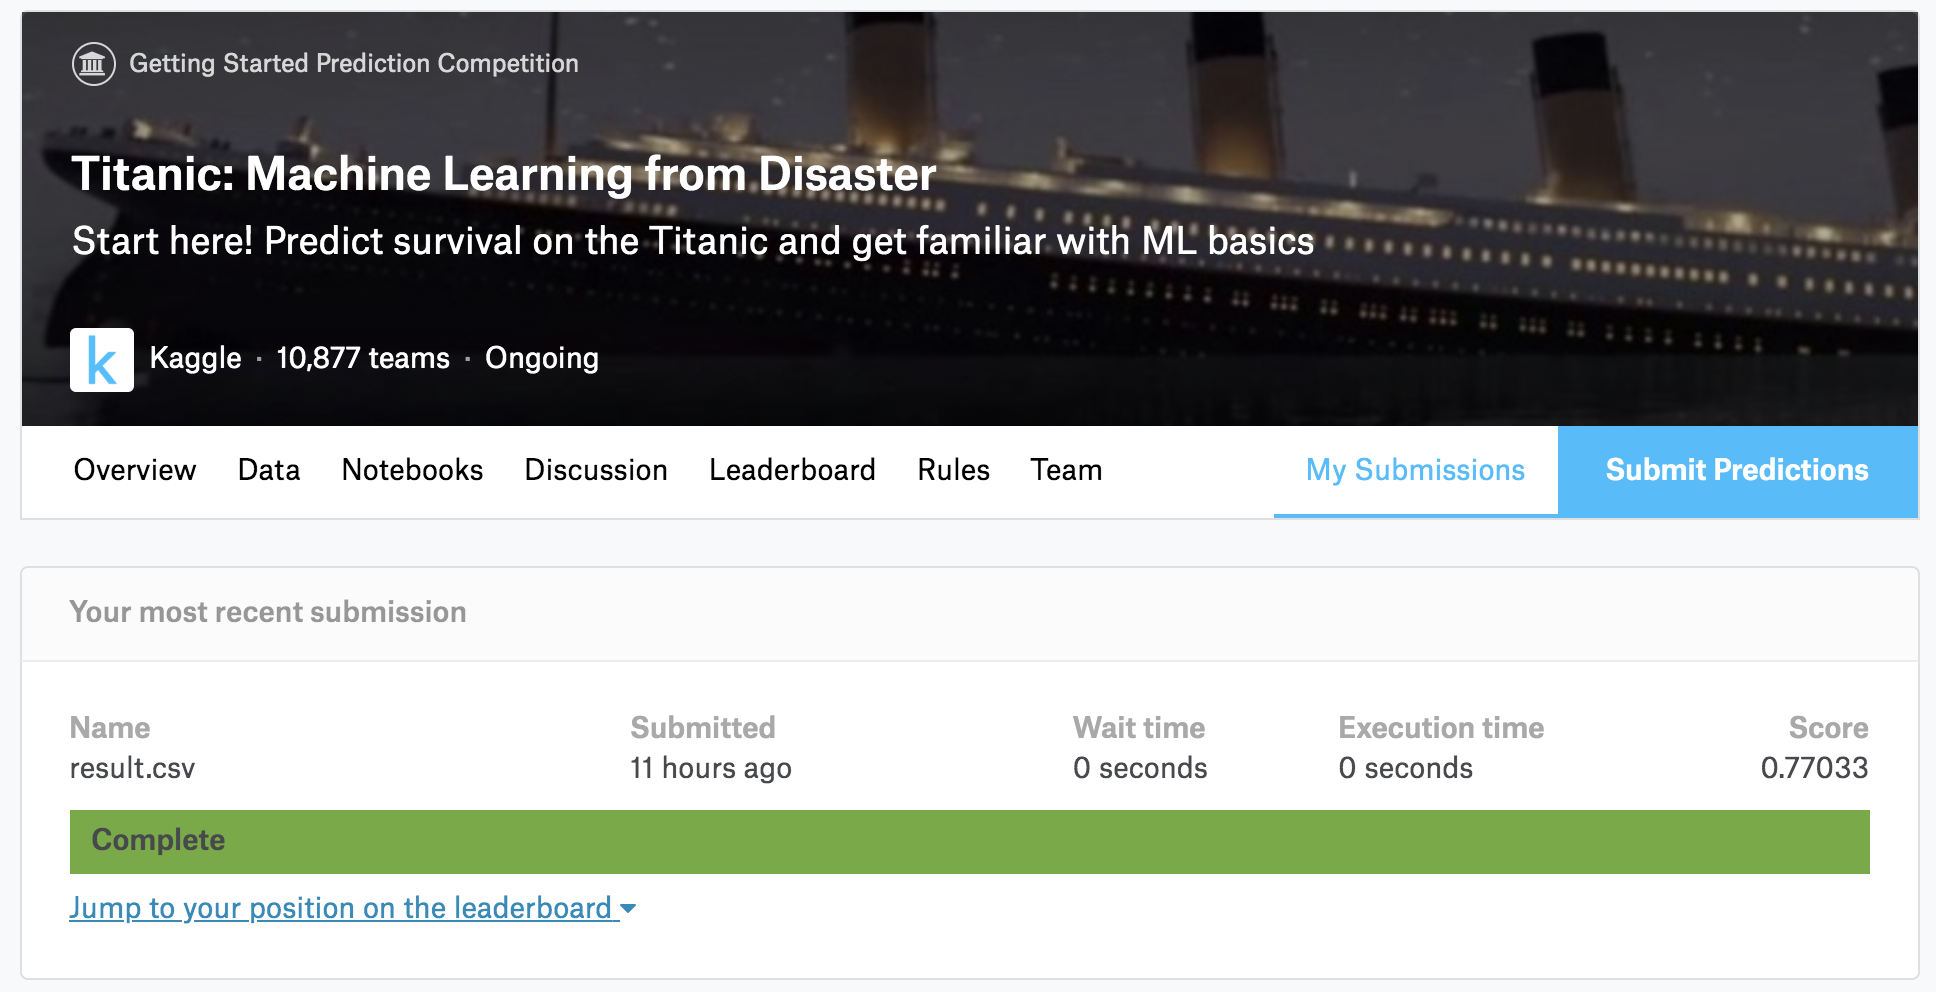

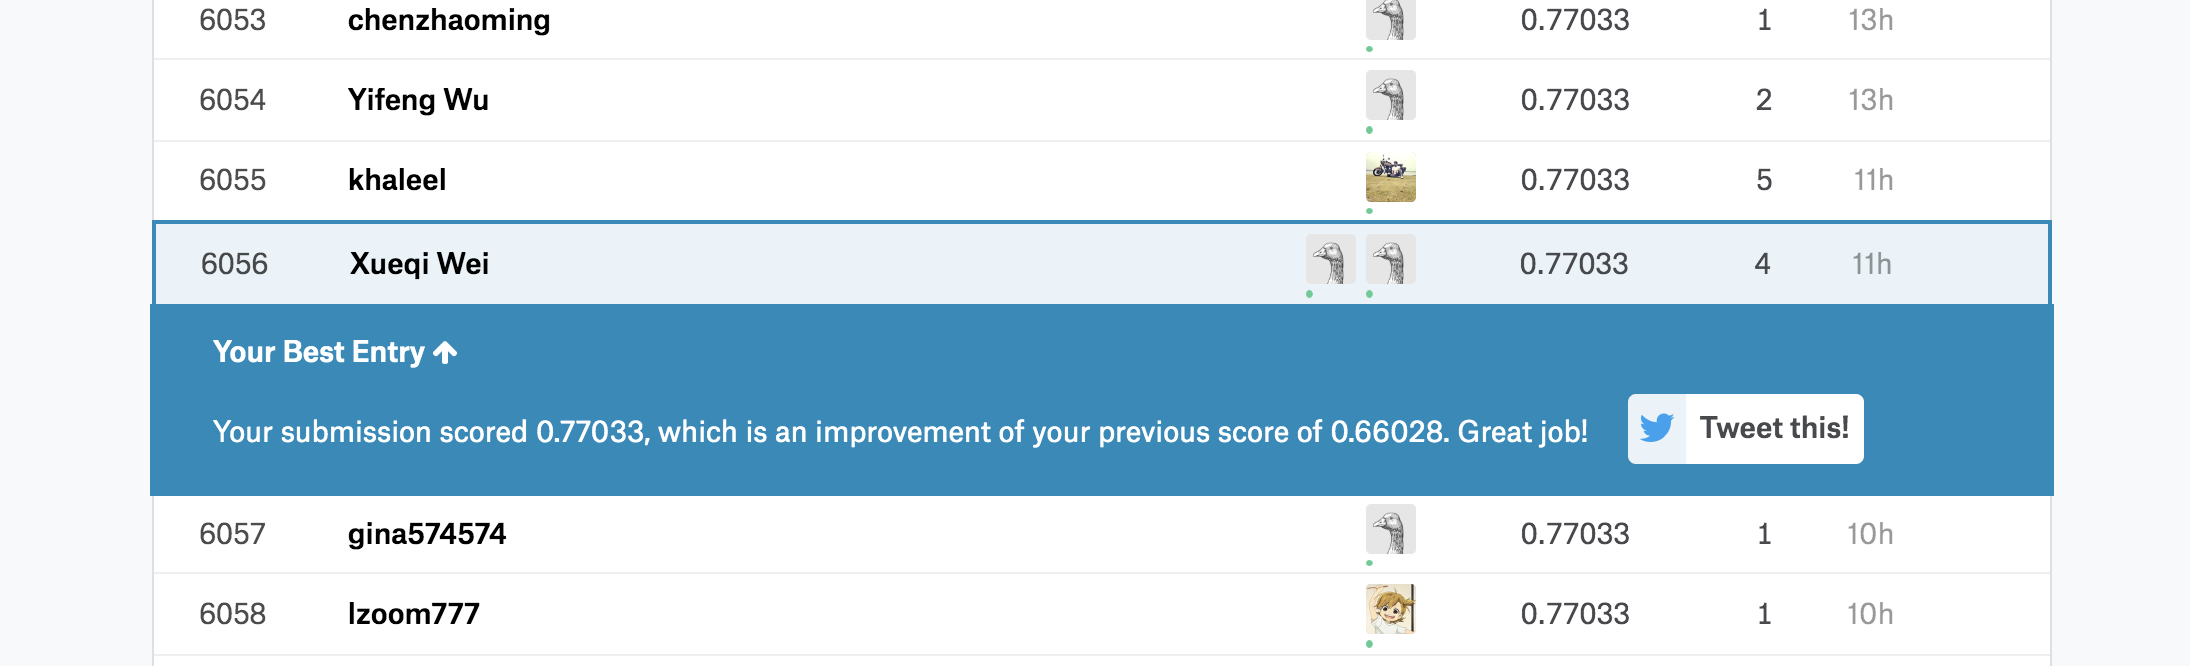